In [187]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import json
import sklearn
import re

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import xgboost as xgb
from xgboost import plot_tree

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [188]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")
sns.set_palette('Spectral')

In [189]:
space_titanic = pd.read_csv("../input/spaceship_titanic/train.csv")
space_titanic_test = pd.read_csv("../input/spaceship_titanic/test.csv")

ntrain = len(space_titanic)
ntest = len(space_titanic_test)

df = space_titanic.copy()
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [157]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [190]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [159]:
#1、Delete unnecessary columns 
df=df.drop(['Name','PassengerId'],axis=1)
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [160]:
#2、Handling null values 
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
len(df)

8693

In [161]:
#3、create y value by using "Transported", convert to int type 标记y值，转换成int类型
target=df['Transported']
df=df.drop(['Transported'],axis=1)
target = target.astype(int)

In [162]:
df.Cabin[:100].values

array(['B/0/P', 'F/0/S', 'A/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S',
       'G/0/S', 'F/3/S', 'B/1/P', 'B/1/P', 'B/1/P', 'F/1/P', 'G/1/S',
       'F/2/P', 'G/734/S', 'F/3/P', 'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P',
       'E/0/S', 'E/0/S', 'E/0/S', 'E/0/S', 'E/0/S', 'E/0/S', 'D/0/P',
       'C/2/S', 'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'F/9/P',
       'F/9/P', 'D/1/S', 'D/1/P', 'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P',
       'B/3/P', 'G/3/P', 'G/3/P', 'G/3/P', 'F/10/P', 'F/10/P', 'E/1/S',
       'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'A/1/S', 'A/1/S', 'G/7/S',
       'F/12/S', 'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'G/10/S',
       'F/15/S', 'E/4/S', 'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P',
       'C/3/S', 'F/18/S', 'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'F/16/P',
       'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P', 'E/5/S', 'G/15/S', 'G/16/S',
       'F/20/S', 'G/9/P', 'G/9/P', 'G/9/P', 'A/2/S', 'G/11/P', 'G/11/P',
       'F/19/P', 'G/12/P', 'G/734/S', 'F/23/S', 'F/24/S', 'G/

In [163]:
df['Cabin1'] = df['Cabin'].apply(lambda x: re.findall('[\w+]', x)[0] if not pd.isna(x) else np.nan)
df['Cabin2'] = df['Cabin'].apply(lambda x: re.findall('[\w+]', x)[1] if not pd.isna(x) else np.nan)
df['Cabin2'] = pd.cut(df['Cabin2'].astype('int'), 5, labels=list(range(5)))
df['Cabin3'] = df['Cabin'].apply(lambda x: re.findall('[\w+]', x)[2] if not pd.isna(x) else np.nan)
df = df.drop(['Cabin'], axis=1)
len(df)

8693

In [164]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
print(f"Numaric columns ({len(numeric_columns)}) :", ", ".join(numeric_columns))

Numaric columns (6) : Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck


In [165]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(cat_columns)}) :",", ".join(cat_columns))

Categorical columns (4) : HomePlanet, Destination, Cabin1, Cabin3


In [166]:
from collections import Counter
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers


In [167]:
outliers_to_drop = detect_outliers(df, 2, numeric_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 1103 indices:  [248, 280, 335, 338, 469, 705, 712, 718, 848, 1157, 1335, 1356, 1390, 1398, 1423, 1603, 1686, 1714, 1734, 1804, 1839, 1923, 1948, 2137, 2159, 2310, 2694, 2857, 2865, 2884, 2930, 3021, 3053, 3181, 3184, 3526, 3562, 3930, 3971, 3998, 4209, 4310, 4407, 4433, 4531, 4657, 4682, 4842, 4934, 5079, 5218, 5242, 5353, 5486, 5722, 5955, 5958, 6067, 6146, 6301, 6469, 6582, 6907, 7030, 7038, 7149, 7224, 7241, 7269, 7289, 7576, 7715, 7729, 7934, 8042, 8170, 8246, 8254, 8516, 8539, 4, 33, 37, 39, 54, 80, 91, 105, 120, 155, 189, 191, 192, 207, 208, 225, 235, 237, 277, 285, 297, 298, 301, 304, 309, 313, 323, 343, 374, 385, 404, 420, 432, 453, 479, 486, 496, 508, 514, 524, 526, 536, 583, 618, 672, 681, 696, 701, 796, 799, 867, 896, 926, 928, 930, 933, 964, 979, 1012, 1033, 1035, 1036, 1037, 1070, 1078, 1099, 1126, 1129, 1163, 1173, 1189, 1214, 1222, 1233, 1256, 1271, 1277, 1314, 1316, 1318, 1341, 1347, 1365, 1366, 1376, 1397, 1420, 1433, 1447, 1462, 1467, 1483, 1499, 15

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, 
                                                    random_state=100,stratify=target)

In [169]:
X_train

HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
7459     Europa       True  TRAPPIST-1e  53.0  False          0.0        0.0   
4720       Mars      False  TRAPPIST-1e  16.0  False       1285.0        0.0   
5469      Earth      False  55 Cancri e   9.0  False          0.0        0.0   
4912      Earth       True  TRAPPIST-1e  22.0  False          0.0        0.0   
2725       Mars       True  55 Cancri e  23.0  False          0.0        0.0   
...         ...        ...          ...   ...    ...          ...        ...   
6775       Mars      False  TRAPPIST-1e  24.0  False          0.0        0.0   
577      Europa      False  TRAPPIST-1e  24.0  False          0.0     3385.0   
3482     Europa      False  TRAPPIST-1e  39.0  False          0.0     2576.0   
3676      Earth      False  TRAPPIST-1e  14.0  False        781.0        0.0   
5344      Earth      False  TRAPPIST-1e  42.0  False          0.0       29.0   

      ShoppingMall     Spa  VRDeck Cabin1 Cabin2 Cabin3  
7459           0.0     0.0     0.0      G      3      3  
4720          14.0  1386.0     0.0      F      4      5  
5469           0.0     0.0     0.0      G      3      3  
4912           0.0     0.0     0.0      G      4      5  
2725           0.0     0.0     0.0      F      3      0  
...            ...     ...     ...    ...    ...    ...  
6775           0.0     0.0     0.0      E      2      7  
577          826.0     9.0   793.0      C      1      3  
3482           0.0   234.0   237.0      B      0      1  
3676           1.0     4.0     1.0      E      1      3  
5344         317.0   434.0    45.0      G      4      1  

[6954 rows x 13 columns]

In [170]:
#9、Using continuous variable training data 
X_train_n=X_train[numeric_columns].copy()
X_test_n=X_test[numeric_columns].copy()

In [171]:
X_train[cat_columns]

HomePlanet  Destination Cabin1 Cabin3
7459     Europa  TRAPPIST-1e      G      3
4720       Mars  TRAPPIST-1e      F      5
5469      Earth  55 Cancri e      G      3
4912      Earth  TRAPPIST-1e      G      5
2725       Mars  55 Cancri e      F      0
...         ...          ...    ...    ...
6775       Mars  TRAPPIST-1e      E      7
577      Europa  TRAPPIST-1e      C      3
3482     Europa  TRAPPIST-1e      B      1
3676      Earth  TRAPPIST-1e      E      3
5344      Earth  TRAPPIST-1e      G      1

[6954 rows x 4 columns]

In [172]:
X_train_c=X_train[cat_columns]
X_test_c=X_test[cat_columns]

In [173]:
encoder=OrdinalEncoder()
X_train_c = encoder.fit_transform(X_train_c)
X_train_c = pd.DataFrame(X_train_c, index=X_train_n.index)
X_test_c = encoder.transform(X_test_c)
X_test_c=pd.DataFrame(X_test_c, index=X_test_n.index)

In [174]:
X_train_c

0    1    2    3
7459  1.0  2.0  6.0  3.0
4720  2.0  2.0  5.0  5.0
5469  0.0  0.0  6.0  3.0
4912  0.0  2.0  6.0  5.0
2725  2.0  0.0  5.0  0.0
...   ...  ...  ...  ...
6775  2.0  2.0  4.0  7.0
577   1.0  2.0  2.0  3.0
3482  1.0  2.0  1.0  1.0
3676  0.0  2.0  4.0  3.0
5344  0.0  2.0  6.0  1.0

[6954 rows x 4 columns]

In [121]:
#12、Merge together
for i,column in enumerate(X_train_c.columns):
    X_train_n["cat_"+str(i+1)]=X_train_c[column]
    X_test_n["cat_"+str(i+1)]=X_test_c[column]

X_train = X_train_n
X_test = X_test_n

In [122]:
X_train

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  cat_1  \
7459  53.0          0.0        0.0           0.0     0.0     0.0    1.0   
4720  16.0       1285.0        0.0          14.0  1386.0     0.0    2.0   
5469   9.0          0.0        0.0           0.0     0.0     0.0    0.0   
4912  22.0          0.0        0.0           0.0     0.0     0.0    0.0   
2725  23.0          0.0        0.0           0.0     0.0     0.0    2.0   
...    ...          ...        ...           ...     ...     ...    ...   
6775  24.0          0.0        0.0           0.0     0.0     0.0    2.0   
577   24.0          0.0     3385.0         826.0     9.0   793.0    1.0   
3482  39.0          0.0     2576.0           0.0   234.0   237.0    1.0   
3676  14.0        781.0        0.0           1.0     4.0     1.0    0.0   
5344  42.0          0.0       29.0         317.0   434.0    45.0    0.0   

      cat_2  cat_3  cat_4  
7459    2.0    6.0    3.0  
4720    2.0    5.0    5.0  
5469    0.0    6.0    3.0  
4912    2.0    6.0    5.0  
2725    0.0    5.0    0.0  
...     ...    ...    ...  
6775    2.0    4.0    7.0  
577     2.0    2.0    3.0  
3482    2.0    1.0    1.0  
3676    2.0    4.0    3.0  
5344    2.0    6.0    1.0  

[6954 rows x 10 columns]

In [44]:
import scipy.stats as stats

#plot function
def univariate_double_plot(df=df, x=None, xlabel=None, explode=None,ylabel=None,palette=None,order=True,hue=None):
    sns.set_palette(palette)
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    #count bar
    if order == True:
        feature_data = df[x].value_counts(ascending=True)
        sns.countplot(data=df, x=x, ax=ax[0], order=feature_data.index,hue = hue)
    
    else:
        feature_data = df[x].value_counts(sort=False).sort_index()
        sns.countplot(data=df, x=x, ax=ax[0],order=feature_data.index,hue = hue)
        
    #pie chart
    patches, texts, autotexts = ax[1].pie(feature_data.values,labels=feature_data.index,
                                      autopct='%.0f%%',textprops={'size': 20})
    for i in range(len(autotexts)):
        autotexts[i].set_color('white')

    #reduce non-data ink
    sns.despine(bottom=True, left=True)
    
    for i in range(len(ax[0].containers)):
        ax[0].bar_label(ax[0].containers[i], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                        color="#7f7f7f")
        
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    #ax[0].set_xticklabels(feature_data.index,rotation=20,fontsize = 'small')
    ax[0].set_ylabel(ylabel=ylabel)
    ax[1].set_ylabel(ylabel=ylabel)
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()
    
def univariate_single_plot(df=df, x=None, xlabel=None, rotation=None,ylabel=None,palette=None):
    sns.set_palette(palette)
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    feature_data = df[x].value_counts(ascending=True)
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel=ylabel)
#     if bar_label:
#         ax.bar_label(ax.containers[0], label_type='edge', size=15, padding=1, fontname="Helvetica, Ariel", 
#                         color="k")
    for i in range(len(feature_data.index)):
        ax.text(i,feature_data.iloc[i]*0.9,feature_data.iloc[i],ha='center',
                   fontsize=20,color='white')
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()
    
    
def univariate_numerical_plot(df=df, x=None, xlabel=None,ylabel=None,palette=None,bins=20):
    sns.set_palette(palette)
    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    #hist
    sns.histplot(bins=bins,data=df, x=x, kde=True, ax=ax[0])
    #box
    sns.boxplot(data=df, y=x, ax=ax[1])
    #prob
    plt.sca(ax[2])
    stats.probplot(df[x], dist = "norm", plot = plt)
    #plt.ylabel('Variable quantiles')
    
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_title(f'The histogram of {x}')
    ax[1].set_xlabel(xlabel=ylabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel=ylabel,size=12, fontdict=FIG_FONT)
    ax[1].set_ylabel(ylabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_title(f'The boxplot of {x}')
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


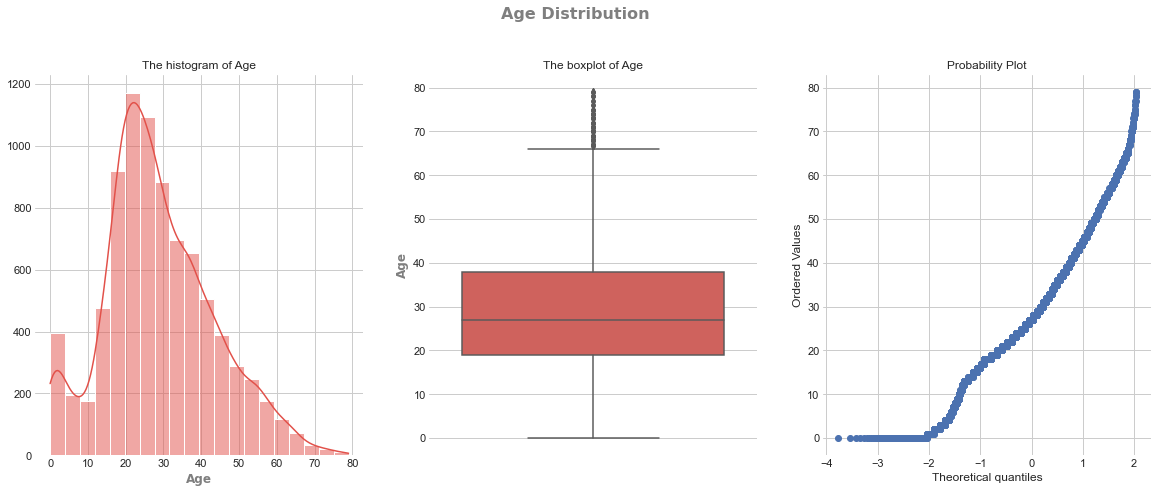

In [45]:
%matplotlib inline
feature_data = univariate_numerical_plot(space_titanic,'Age','Age')

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


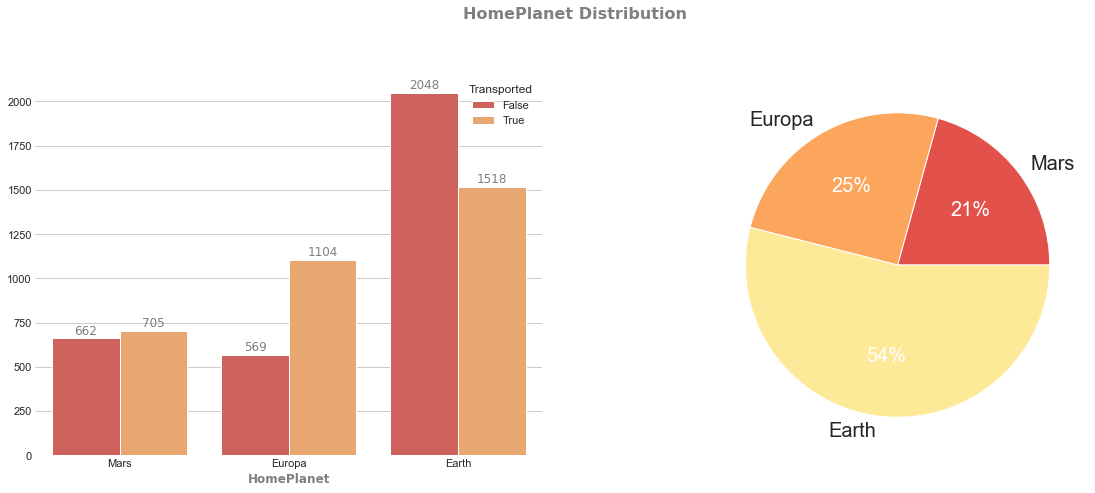

In [46]:
x='HomePlanet'
univariate_double_plot(space_titanic.dropna(),x,x,hue='Transported')

In [47]:
space_titanic.groupby(['HomePlanet', 'Transported'])['HomePlanet'].count()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Name: HomePlanet, dtype: int64

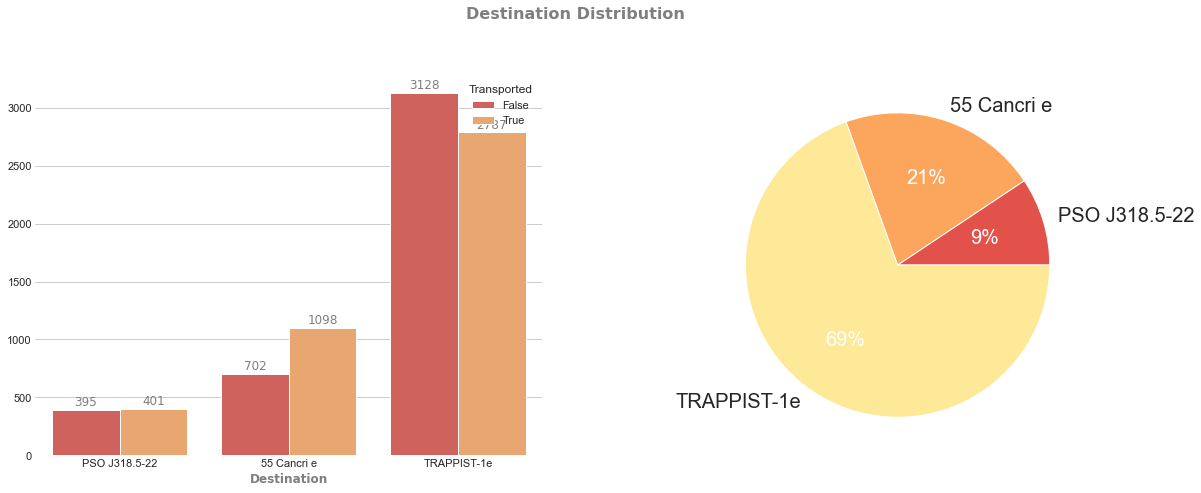

In [48]:
x='Destination'
univariate_double_plot(space_titanic,x,x,hue='Transported')

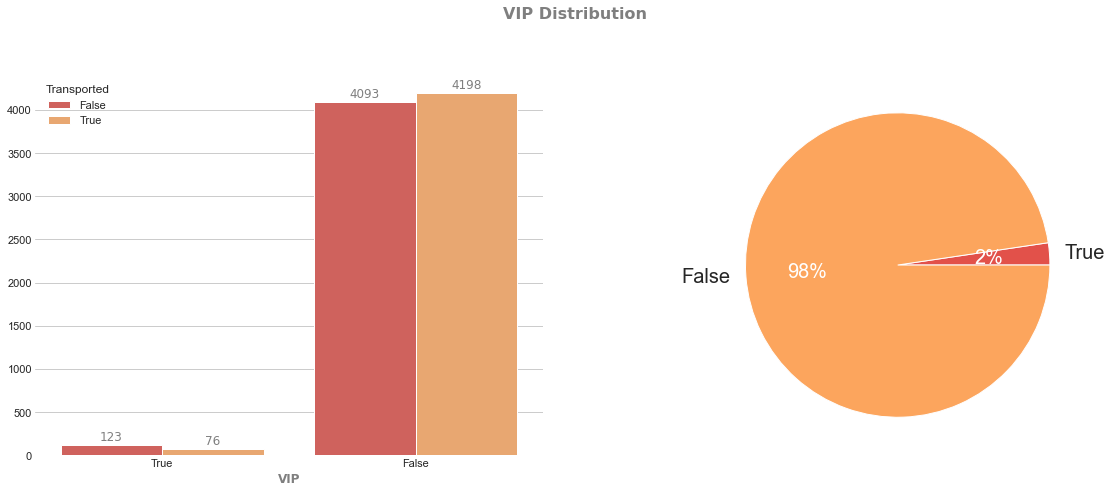

In [49]:
x='VIP'
univariate_double_plot(space_titanic,x,x,hue='Transported')

In [51]:
def Chi_square_test(data,use_method=1,alpha=0.05):
    #1 Chi square independence test
    #Use mode 1 or mode 2: select 2 for 1 degree of freedom and 1 for others
    # use_method = 1 
    # alpha=0.05 # Set quantile value

    data=data.astype(int)
    data_j=data.sum()/data.sum().sum()  #Calculate column marginal probability
    data_i=data.sum(axis=1)             #Calculate row marginal probability

    #Here, the degree of freedom of the matrix should be:(columns_numbers-1)*(row_numbers-1)
    k=(len(data.columns)-1)*(len(data)-1)
    #The corresponding rejection domain is:
    rej_boundary=stats.chi2.ppf(1-alpha/2, k)

    data_exp=np.dot(data_i.values.reshape(-1,1),data_j.values.reshape(1,-1)) 
    data_exp=pd.DataFrame(data_exp,index=data_i.index,columns=data_j.index) 
    data_obj=data.values.flatten()
    data_exp=data_exp.values.flatten()

    def calculate_chi_val(use_method):
        if use_method == 1:
            # method1: The matrix is compressed into one-dimensional calculation,
            # which is applicable to the case where the degree of freedom is greater than 1
            # while using stats.chisquare, the degree of freedom is len(f_obs)-1-ddof=(len(data.columns)-1)*(len(data)-1)，so the parameter 'ddof' should be 
            chi_val,p_val=stats.chisquare(f_obs=data_obj,f_exp=data_exp,ddof=len(data_obj)-1-(len(data.columns)-1)*(len(data)-1))
            return chi_val,p_val

        elif use_method == 2:
            #method2：When the degree of freedom is 1, chi square test is performed on the frequency data, 
            # the probability will be low when the chi square distribution of continuous variables is used to calculate the probability
            #use this formula: X_c^2 = sum(|O-E|-0.5)^2/E
            chi_val=0
            for i in range(len(data_obj)):
                chi_val += (abs(data_obj[i]-data_exp[i])-0.5)**2/data_exp[i]
            p_val=scipy.stats.chi2.sf(abs(chi_val),k)
            return chi_val,p_val

    chi_val,p_val = calculate_chi_val(use_method)
    print('The Chi square value of the sample is:{:.3f}, The corresponding degrees of freedom is: {}, \nwhen alpha={}, p-value is :{:.8f}, Reject domain boundary is: {:.3f}'
          .format(chi_val,k,alpha,p_val,rej_boundary))

    if chi_val>rej_boundary:
        print(f'Conclusion： alpha=0.05, refuse H0, accpet H1. There are essential differences between {data.index.values} in {data.index.name}')
        print('-'*120)
    else:
        print(f'Conclusion: alpha=0.05, accpet H0, refuse H1. There is no essential difference between {data.index.values} in {data.index.name}')
        print('-'*120)

In [52]:
categories=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for category in categories:
    feature=[category,'Transported']
    data = space_titanic[feature]
    data=data.pivot_table(index=feature[0],columns=feature[1],aggfunc=len,fill_value=0)
    if 'No internet service' in data.index.values:
        data.drop('No internet service',inplace=True)
    if 'No phone service' in data.index.values:
        data.drop('No phone service',inplace=True)
    print(f'data matrix:\n{data}\n')
    #print(f'The freedom of the matrix is {len(data.index.values)-1}\n')
    #print(data.index.values,data.index.name)
    Chi_square_test(data,len(data.index.values)-1,0.01)

data matrix:
Transported  False  True
HomePlanet              
Earth         2651  1951
Europa         727  1404
Mars           839   920

The Chi square value of the sample is:323.885, The corresponding degrees of freedom is: 2, 
when alpha=0.01, p-value is :0.00000000, Reject domain boundary is: 10.597
Conclusion： alpha=0.05, refuse H0, accpet H1. There are essential differences between ['Earth' 'Europa' 'Mars'] in HomePlanet
------------------------------------------------------------------------------------------------------------------------
data matrix:
Transported  False  True
CryoSleep               
False         3650  1789
True           554  2483

The Chi square value of the sample is:1861.567, The corresponding degrees of freedom is: 1, 
when alpha=0.01, p-value is :0.00000000, Reject domain boundary is: 7.879
Conclusion： alpha=0.05, refuse H0, accpet H1. There are essential differences between [False True] in CryoSleep
------------------------------------------------------

In [123]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6954, 10) (1739, 10) (6954,) (1739,)


In [124]:
temp_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [125]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc", "learning_rate": 0.5}
cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=10, params=PARAMETERS, as_pandas=True, seed=123 )
cv_results

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.880731       0.002401       0.845449      0.007853
1        0.894001       0.001725       0.855780      0.010454
2        0.902743       0.001839       0.861405      0.009307
3        0.906877       0.002830       0.864288      0.008516
4        0.910397       0.003193       0.867382      0.009237
5        0.913169       0.003133       0.867297      0.008556
6        0.915864       0.002376       0.868220      0.008263
7        0.918101       0.003066       0.868977      0.008648
8        0.920419       0.002387       0.869848      0.008093
9        0.921800       0.002135       0.870364      0.007846

In [126]:
# max_depth
results=[]
for value in range(3, 10):
    PARAMETERS['max_depth'] = value
    cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5, num_boost_round=10, params=PARAMETERS, as_pandas=True, seed=123)
    results.append((cv_results["train-auc-mean"].tail().values[-1],cv_results["test-auc-mean"].tail().values[-1]))
            
data = list(zip(range(3,10,1), results))
print(pd.DataFrame(data,columns=['max_depth',"auc(train,test)"]))

   max_depth                           auc(train,test)
0          3  (0.8795019408010342, 0.8633972075962137)
1          4  (0.8947534293477931, 0.8685193571140732)
2          5   (0.9069079166072769, 0.869645577107659)
3          6  (0.9218004506409058, 0.8703636841374068)
4          7  (0.9352351916733219, 0.8691320508520232)
5          8  (0.9456310206350752, 0.8691516243247616)
6          9   (0.956214163472491, 0.8676787194180063)


In [127]:
# gamma
results=[]
for value in [0.1,0.2,0.5,1,1.5,2]:
    PARAMETERS['gamma'] = value
    cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=10,params=PARAMETERS, as_pandas=True, seed=123)
    results.append((cv_results["train-auc-mean"].tail().values[-1],cv_results["test-auc-mean"].tail().values[-1]))
            
data = list(zip([0.1,0.2,0.5,1,1.5,2], results))
print(pd.DataFrame(data,columns=['gamma',"auc(train,test)"]))

   gamma                           auc(train,test)
0    0.1  (0.9559335311992869, 0.8682817862543037)
1    0.2  (0.9572973861875106, 0.8661868486728647)
2    0.5  (0.9537661148341348, 0.8691063025474255)
3    1.0   (0.9531117945604196, 0.868771049673024)
4    1.5   (0.9513065589130125, 0.867326182830879)
5    2.0  (0.9466829190373783, 0.8691532835656839)


In [128]:
# colsample_bytree
results=[]
for value in [.4,.5,.6,.7,.8,.9]:
    PARAMETERS['colsample_bytree'] = value
    cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=10,params=PARAMETERS, as_pandas=True, seed=123)
    results.append((cv_results["train-auc-mean"].tail().values[-1],cv_results["test-auc-mean"].tail().values[-1]))
            
data = list(zip([.4,.5,.6,.7,.8,.9], results))
print(pd.DataFrame(data,columns=['colsample_bytree',"auc(train,test)"]))

   colsample_bytree                           auc(train,test)
0               0.4  (0.9370642526109363, 0.8627629375284711)
1               0.5  (0.9416087986279387, 0.8667394619072221)
2               0.6   (0.9456313837916561, 0.867215570189539)
3               0.7  (0.9464503189646273, 0.8684679742396059)
4               0.8  (0.9485000618443804, 0.8706350686343823)
5               0.9  (0.9478301345398232, 0.8721749373593907)


In [129]:
learning_rate = [0.1]
max_depth = [6]
# min_child_weigh = list(range(0,5,2))
gamma=[0.5,0.7,1]
subsample = [.9,1]
colsample_bytree = [.8,1]
# scale_pos_weight = [.5,1,2]
# reg_alpha = np.linspace(0.001,1,2).tolist()
reg_lambda = [1]
# n_estimators = [50,200,400]

parameters = { 'learning_rate': learning_rate,
              'max_depth': max_depth,
#              'min_child_weigh':min_child_weigh,
             'gamma':gamma,
             'subsample':subsample,
             'colsample_bytree':colsample_bytree,
#              'scale_pos_weight':scale_pos_weight,
#              'reg_alpha':reg_alpha,
             'reg_lambda':reg_lambda,
#              'n_estimators':n_estimators
             }

model = xgb.XGBClassifier(tree_method="gpu_hist")
clf = GridSearchCV(model, parameters,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  36 | elapsed:   30.1s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   32.5s finished


In [130]:
clf.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'reg_lambda': 1,
 'subsample': 0.9}

In [131]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
roc_auc_score(y_test,y_test_pred)

0.7973499579358403

In [132]:
print(classification_report(y_test, y_test_pred, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       863
           1       0.78      0.83      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



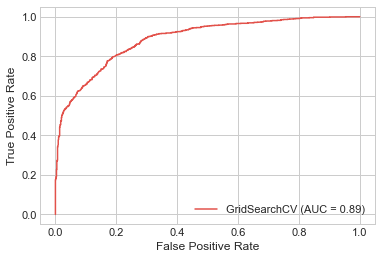

In [133]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

In [135]:
X_c

PassengerId HomePlanet CryoSleep    Destination    VIP              Name  \
0        0013_01      Earth      True    TRAPPIST-1e  False   Nelly Carsoning   
1        0018_01      Earth     False    TRAPPIST-1e  False    Lerome Peckers   
2        0019_01     Europa      True    55 Cancri e  False   Sabih Unhearfus   
3        0021_01     Europa     False    TRAPPIST-1e  False  Meratz Caltilter   
4        0023_01      Earth     False    TRAPPIST-1e  False   Brence Harperez   
...          ...        ...       ...            ...    ...               ...   
4272     9266_02      Earth      True    TRAPPIST-1e  False       Jeron Peter   
4273     9269_01      Earth     False    TRAPPIST-1e  False     Matty Scheron   
4274     9271_01       Mars      True    55 Cancri e  False       Jayrin Pore   
4275     9273_01     Europa     False            NaN  False    Kitakan Conale   
4276     9277_01      Earth      True  PSO J318.5-22  False  Lilace Leonzaley   

     Cabin_1 Cabin_3  
0          G       S  
1          F       S  
2          C       S  
3          C       S  
4          F       S  
...      ...     ...  
4272       G       S  
4273       0       0  
4274       D       P  
4275       D       P  
4276       G       S  

[4277 rows x 8 columns]

In [144]:
cat_columns

['HomePlanet', 'Destination', 'Cabin1', 'Cabin3']

In [176]:
X_c

HomePlanet    Destination Cabin_1 Cabin_3
0         Earth    TRAPPIST-1e       G       S
1         Earth    TRAPPIST-1e       F       S
2        Europa    55 Cancri e       C       S
3        Europa    TRAPPIST-1e       C       S
4         Earth    TRAPPIST-1e       F       S
...         ...            ...     ...     ...
4272      Earth    TRAPPIST-1e       G       S
4273      Earth    TRAPPIST-1e       0       0
4274       Mars    55 Cancri e       D       P
4275     Europa    TRAPPIST-1e       D       P
4276      Earth  PSO J318.5-22       G       S

[4277 rows x 4 columns]

In [181]:
X_c.shape

(4277, 4)

In [182]:
df_test = pd.read_csv("../input/spaceship_titanic/test.csv")

df_test = df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_test['Cabin_1']=df_test['Cabin'].apply(lambda x: re.findall('[\w+]',x)[0] if pd.isnull(x) == False else np.nan)
df_test['Cabin_2']=df_test['Cabin'].apply(lambda x: re.findall('[\w]+',x)[1] if pd.isnull(x) == False else np.nan)
df_test['Cabin_2']=pd.cut(df_test['Cabin_2'].astype('int'),5,labels=[0,1,2,3,4])
df_test['Cabin_3']=df_test['Cabin'].apply(lambda x: re.findall('[\w]+',x)[2] if pd.isnull(x) == False else np.nan)
df_test=df_test.drop(['Cabin', 'PassengerId', 'Name'],axis=1)
df_test = df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

numeric_columns=list(df_test.select_dtypes(include=np.number).columns)
cat_columns=df_test.select_dtypes(include=['object']).columns.tolist()
print(cat_columns)

X_n = df_test[numeric_columns].copy()
X_c = df_test[cat_columns].copy()

X_c = encoder.transform(X_c)
for i,column in enumerate(cat_columns):
    X_n["cat_"+str(i+1)]=X_c[:,i]

X_test = X_n
X_test


['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']


Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  cat_1  \
0     27.0          0.0        0.0           0.0     0.0     0.0    0.0   
1     19.0          0.0        9.0           0.0  2823.0     0.0    0.0   
2     31.0          0.0        0.0           0.0     0.0     0.0    1.0   
3     38.0          0.0     6652.0           0.0   181.0   585.0    1.0   
4     20.0         10.0        0.0         635.0     0.0     0.0    0.0   
...    ...          ...        ...           ...     ...     ...    ...   
4272  34.0          0.0        0.0           0.0     0.0     0.0    0.0   
4273  42.0          0.0      847.0          17.0    10.0   144.0    0.0   
4274  18.0          0.0        0.0           0.0     0.0     0.0    2.0   
4275  18.0          0.0     2680.0           0.0     0.0   523.0    1.0   
4276  43.0          0.0        0.0           0.0     0.0     0.0    0.0   

      cat_2  cat_3  cat_4  
0       2.0    6.0   11.0  
1       2.0    5.0   11.0  
2       0.0    2.0   11.0  
3       2.0    2.0   11.0  
4       2.0    5.0   11.0  
...     ...    ...    ...  
4272    2.0    6.0   11.0  
4273    2.0    6.0   10.0  
4274    0.0    3.0   10.0  
4275    2.0    3.0   10.0  
4276    1.0    6.0   11.0  

[4277 rows x 10 columns]

In [185]:

submission = pd.read_csv("../input/spaceship_titanic/sample_submission.csv")
y_test_pred = clf.predict(X_test)
y_test_pred_ = ['True' if x == 1 else 'False' for x in y_test_pred]
submission['Transported'] = y_test_pred_
# submission.columns = ["PassengerId", "Survived"]
submission.to_csv('../output/spaceship_titanic.csv', header = True, index = False)